In [1]:
from integrate_it.integrate import *
from matplotlib import pyplot as plt
from matplotlib.patches import Polygon
import numpy as np

# Задание региона

Вводите точки в формате "x y" (минимум 3). Для окончания ввода введите пустую строку.

In [2]:
verts = [[-17, 10], [-17, 15], [13, 15], [13, 10]]
if len(verts) == 0:
    inp = ""
    while True:
        inp = input()
        try:
            verts.append(list(map(float, inp.split())))
            if len(verts[-1]) != 2:
                verts.pop(-1)
            else:
                continue
        except Exception:
            pass
        if inp == "" and len(verts) >=3:
                break
        print("Неверный формат ввода!")

In [3]:
verts = np.array(verts,dtype=float)
rg = Region(verts,True)

/tmp/ipykernel_34069/3375063390.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


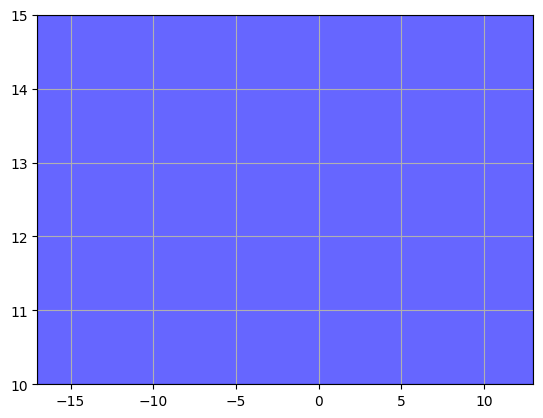

In [4]:
poly = Polygon(verts)
poly.set_color("b")
poly.set_alpha(0.6)
fig, ax = plt.subplots()
x_l = (np.min(verts[:,0]),np.max(verts[:,0]))
y_l = (np.min(verts[:,1]),np.max(verts[:,1]))
ax.set_xlim(x_l)
ax.set_ylim(y_l)
ax.add_patch(poly)
ax.grid(True)
fig.show()

# Задание Функции

In [5]:
func = lambda x, y: x**2 / y
func_der_x = lambda x, y: 2*x/y
func_der_y = lambda x, y: -x**2 / (y**2)
func_der_xy = lambda x, y: -2*x / (y**2)

# Интегрирование

In [6]:
N_x, N_y = [10000]*2
part = Partition(func,rg,"grid",N_x,N_y)
info = {
    "n_x":N_x,
    "n_y":N_y,
    "diff_x": rg.get_max_x() - rg.get_min_x(),
    "diff_y": rg.get_max_y() - rg.get_min_y(),
    "max_func": 17**2 / 10,
    "max_dfunc_dx": 2*17/10,
    "max_dfunc_dy": (17/10)**2,
    "max_dfunc_dx_dy": 2*17/100
}
integ = Integrator_Riemann(func,info_dict=info)

In [7]:
integ_output = integ.generate_riemann_sum(part)

In [8]:
integ_output

{'riemann_sum': 961.0450599564429, 'fineness': 9.25e-06, 'error': 0.873394125}